# What is an oversampled PSF?

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import galsim

In [3]:
#galsim example code (altered a bit to match Euclid)
lam = 800  # nm
diam = 1.2    # meters
lam_over_diam = (lam * 1.e-9) / diam  # radians
lam_over_diam *= 206265  # Convert to arcsec

psf = galsim.OpticalPSF(
    lam_over_diam=lam_over_diam,
    obscuration=.3,
    nstruts=3,
    #gsparams=gsp,
)

## This is what we do:

In [4]:
psf_super_image = psf.drawImage(nx=200,ny=200,wcs=galsim.PixelScale(0.1/3),method="auto")

## Is this what we were supposed to do?

In [5]:
euclid_pixel = galsim.Pixel(0.1)
psf_richard = galsim.Convolve([euclid_pixel,psf])
psf_richard_image = psf.drawImage(nx=200,ny=200,wcs=galsim.PixelScale(0.1/3),method="no_pixel")

## Results:

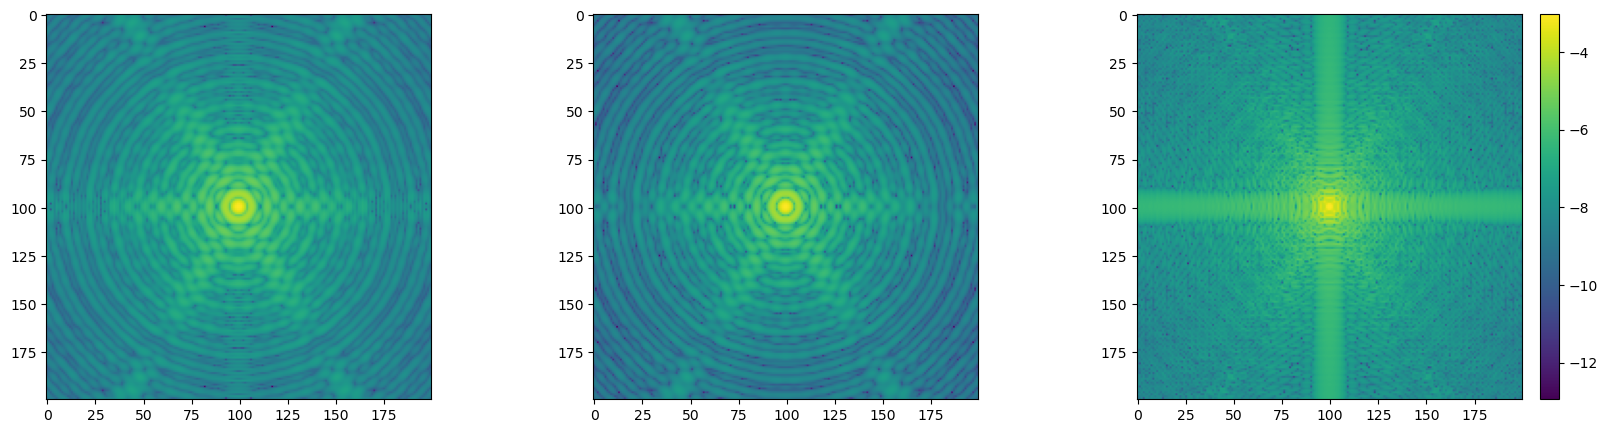

In [6]:
figure(figsize=(20,5))
subplot(131)
imshow(log10(abs(psf_super_image.array)))
subplot(132)
imshow(log10(abs(psf_richard_image.array)))
subplot(133)
imshow(log10(abs(psf_super_image.array - psf_richard_image.array)));colorbar(fraction=0.046, pad=0.04)